In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
le_agency = LabelEncoder()
le_type = LabelEncoder()
le_country = LabelEncoder()
le_state = LabelEncoder()

## Load Dataset

In [2]:
file_path = r'C:\Users\Aakanksha\OneDrive\Desktop\Project\Vendor-Segmentation-Risk-Detection\data\raw\vendor_data_raw_2021_2024.csv'
df = pd.read_csv(file_path)

## Preview the data

In [3]:
print("Data Preview:")
display(df.head())

Data Preview:


,Transaction_ID,Vendor_Name,Award_Amount,Award_Agency,Award_Date,Award_Type,Performance_Country,Performance_State
0,TRX00001,"Little, Chandler and Johnson",1384004.16,Department of Agriculture,2022-09-05,Indefinite Delivery Contract,USA,GA
1,TRX00002,"Bryant, Castillo and Weaver",2800693.04,Department of Energy,2022-08-03,Time-and-Materials Contract,USA,GA
2,TRX00003,"Burns, Nichols and Hernandez",4332198.07,NASA,2021-01-27,Fixed-Price Contract,USA,PA
3,TRX00004,"Choi, Gilmore and Hanson",3363947.05,Department of Education,2021-11-07,Indefinite Delivery Contract,MEX,TX
4,TRX00005,Ferrell Group,640640.51,NASA,2024-02-02,Indefinite Delivery Contract,USA,NY


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction_ID       15000 non-null  object 
 1   Vendor_Name          15000 non-null  object 
 2   Award_Amount         15000 non-null  float64
 3   Award_Agency         15000 non-null  object 
 4   Award_Date           15000 non-null  object 
 5   Award_Type           15000 non-null  object 
 6   Performance_Country  15000 non-null  object 
 7   Performance_State    15000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 937.6+ KB


## Missing Values

In [5]:
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Transaction_ID         0
Vendor_Name            0
Award_Amount           0
Award_Agency           0
Award_Date             0
Award_Type             0
Performance_Country    0
Performance_State      0
dtype: int64


## Basic Statistics

In [6]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Award_Amount
count,1.500000e+04
mean,2.499050e+06
std,1.438892e+06
min,5.481740e+03
25%,1.254287e+06
50%,2.500421e+06
75%,3.748676e+06
max,4.999900e+06


## Data Cleaning

In [7]:
df = df[df['Award_Amount'] > 0] 
#Remove rows with non-positive award amounts (bad data)

## Feature Engineering

## Award Year (Extarct Year from Award_Date)

In [8]:
df["Award_Year"] = pd.to_datetime(df["Award_Date"]).dt.year

## Log of Award Amount (for scaling large numbers)

In [9]:
df["Log_Award_Amount"] = np.log(df["Award_Amount"] + 1)  
# Adding 1 to avoid log(0)

## Encode Contract Category and Region (for ML)

In [10]:
print(df.columns.tolist())

['Transaction_ID', 'Vendor_Name', 'Award_Amount', 'Award_Agency', 'Award_Date', 'Award_Type', 'Performance_Country', 'Performance_State', 'Award_Year', 'Log_Award_Amount']


In [11]:
df['Award_Agency_Code'] = le_agency.fit_transform(df['Award_Agency'])
df['Award_Type_Code'] = le_type.fit_transform(df['Award_Type'])
df['Performance_Country_Code'] = le_country.fit_transform(df['Performance_Country'])
df['Performance_State_Code'] = le_state.fit_transform(df['Performance_State'])
# Converts categorical ('Text') data to numerical because ML doesn't understand Text data it only takes Numbers as the input

## Visualization: Award Amount Distribution

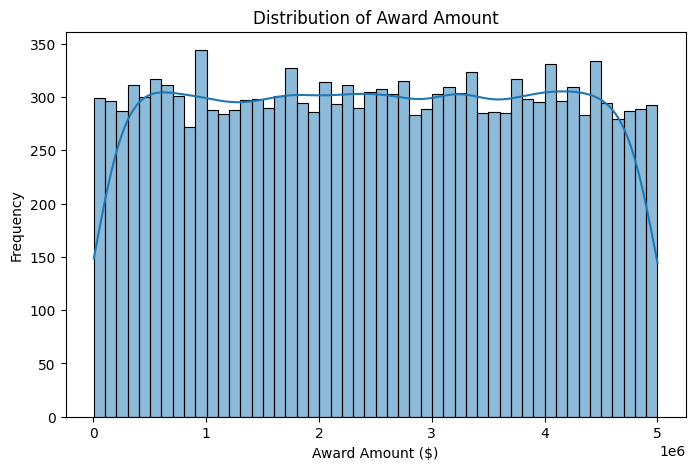

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Award_Amount'], bins=50, kde=True)
plt.title("Distribution of Award Amount")
plt.xlabel("Award Amount ($)")
plt.ylabel("Frequency")
plt.show()


## Save Processed Data

In [13]:
processed_path = '../data/processed/vendor_data_processed.csv'
df.to_csv(processed_path, index=False)
print(f"\n✅ Processed file saved to {processed_path}")


✅ Processed file saved to ../data/processed/vendor_data_processed.csv


## Load and clean raw data using processing pipeline

In [17]:
import sys
import os
sys.path.append(os.path.abspath("../"))

from src.data_processing import full_pipeline

df = full_pipeline("../data/raw/vendor_data_raw_2021_2024.csv")
df.head()




,Transaction_ID,Vendor_Name,Award_Amount,Award_Agency,Award_Date,Award_Type,Performance_Country,Performance_State,Log_Award_Amount,Award_Agency_Code,Award_Type_Code,Performance_Country_Code,Performance_State_Code
0,TRX00001,"Little, Chandler and Johnson",1384004.16,Department of Agriculture,2022-09-05,Indefinite Delivery Contract,USA,GA,14.140492,0,2,2,2
1,TRX00002,"Bryant, Castillo and Weaver",2800693.04,Department of Energy,2022-08-03,Time-and-Materials Contract,USA,GA,14.845378,3,3,2,2
2,TRX00003,"Burns, Nichols and Hernandez",4332198.07,NASA,2021-01-27,Fixed-Price Contract,USA,PA,15.281586,6,1,2,7
3,TRX00004,"Choi, Gilmore and Hanson",3363947.05,Department of Education,2021-11-07,Indefinite Delivery Contract,MEX,TX,15.028626,2,2,1,8
4,TRX00005,Ferrell Group,640640.51,NASA,2024-02-02,Indefinite Delivery Contract,USA,NY,13.370225,6,2,2,5


In [18]:
df.to_csv("../data/processed/vendor_data_processed.csv", index=False)